# Financial Econometrics - Homework 5
Dimitrios TERESSONOK - B00763957
Semen MANUSHKO - B00760363
William TAN - B00762546 

In [1]:
import math
import itertools
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from arch import arch_model
from pandas_datareader import data
from datetime import date, timedelta
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import register_matplotlib_converters

In [2]:
companies = ['AAPL', 'GOOG', 'AMZN']
start_date, end_date = '2016-01-01', '2020-01-01'
returns = data.DataReader(companies, 'yahoo', start_date, end_date)['Adj Close']
for i in range(len(companies)):
    returns[companies[i]] = np.append(0,np.diff(np.log(returns[companies[i]])))*100
returns.tail()

Symbols,AAPL,GOOG,AMZN
Date,,,
2019-12-24,0.095021,-0.392209,-0.211603
2019-12-26,1.964615,1.245594,4.350631
2019-12-27,-0.037961,-0.627517,0.055103
2019-12-30,0.591764,-1.171875,-1.232835
2019-12-31,0.727991,0.065840,0.051422


## Question 1

### Basic descriptive statistics.

In [3]:
returns.describe()

Symbols,AAPL,GOOG,AMZN
count,1006.000000,1006.000000,1006.000000
mean,0.108636,0.058555,0.105867
std,1.535704,1.411336,1.750102
min,-10.492440,-8.008929,-8.142352
25%,-0.547892,-0.530997,-0.630503
50%,0.097612,0.067215,0.138083
75%,0.884590,0.819523,0.964548
max,6.805250,9.937955,12.413059


### Time series plots of returns

C:\Users\William\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


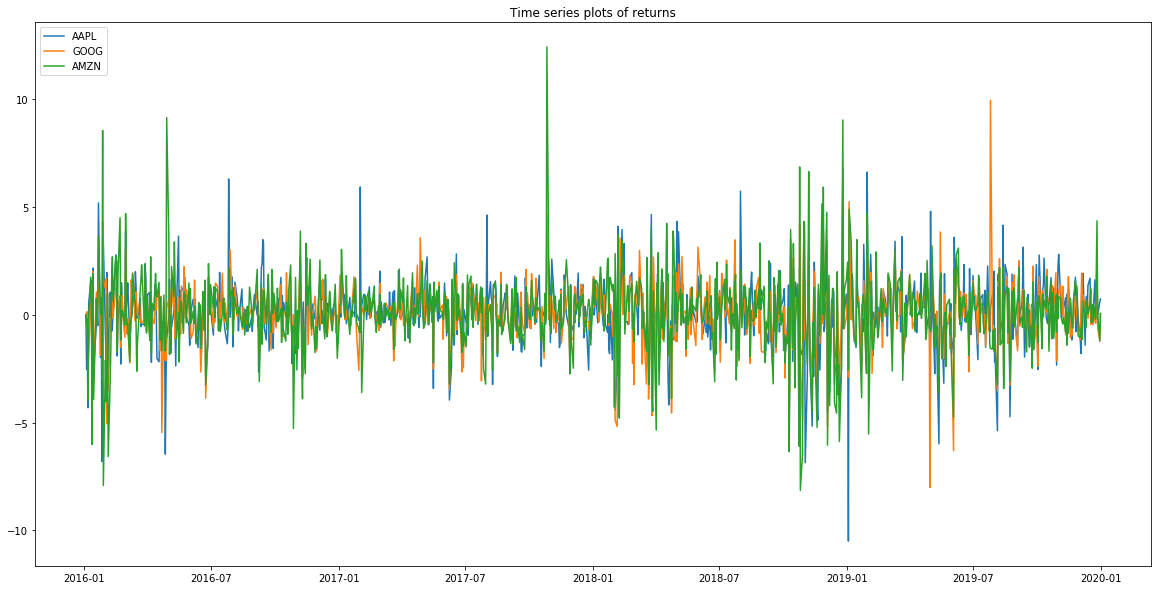

In [4]:
plt.figure(figsize=(20,10))
plt.plot(returns)
plt.title('Time series plots of returns')
plt.legend(companies, loc=2)
plt.show()
register_matplotlib_converters()

### The unconditional correlation matrix.

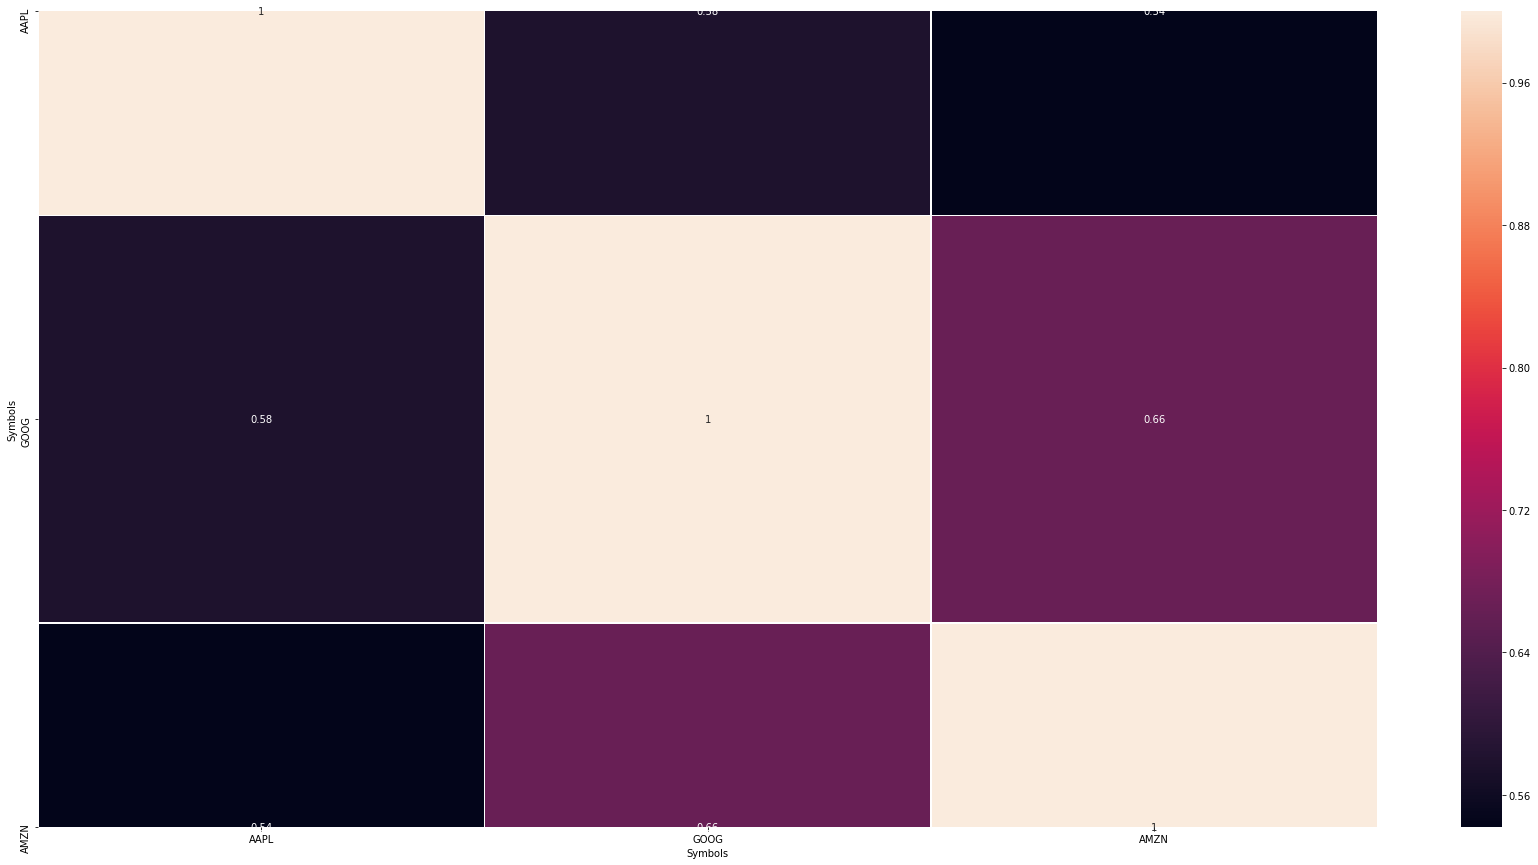

In [5]:
fig, ax = plt.subplots(figsize=(30,15)) 
sn.heatmap(returns.corr(), annot=True, linewidths=.5)
plt.show()

## Question 2

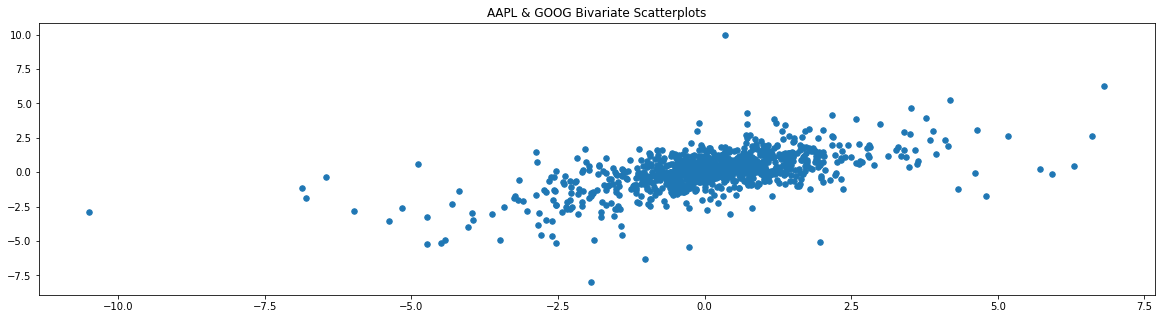

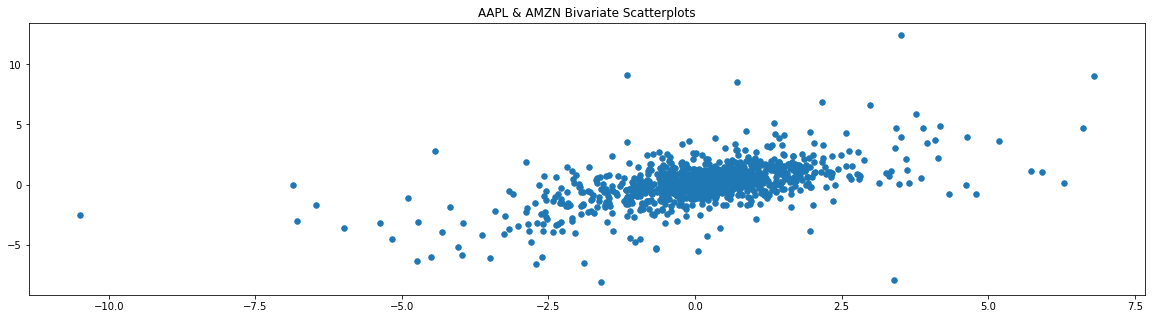

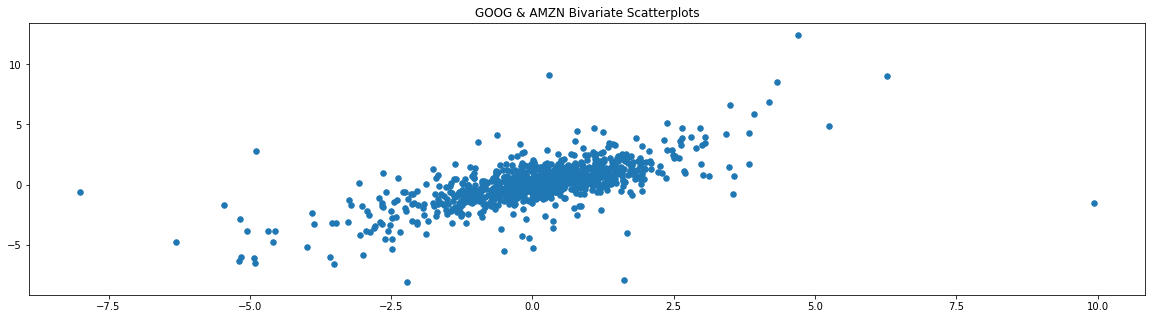

In [6]:
for pair in itertools.combinations(companies, 2):
    fig, ax = plt.subplots(figsize=(20,5))
    ax.scatter(x=returns[pair[0]], y=returns[pair[1]], s=30)
    plt.title(str(pair[0]) + ' & ' + str(pair[1]) + ' Bivariate Scatterplots')
plt.show()

# Question 3

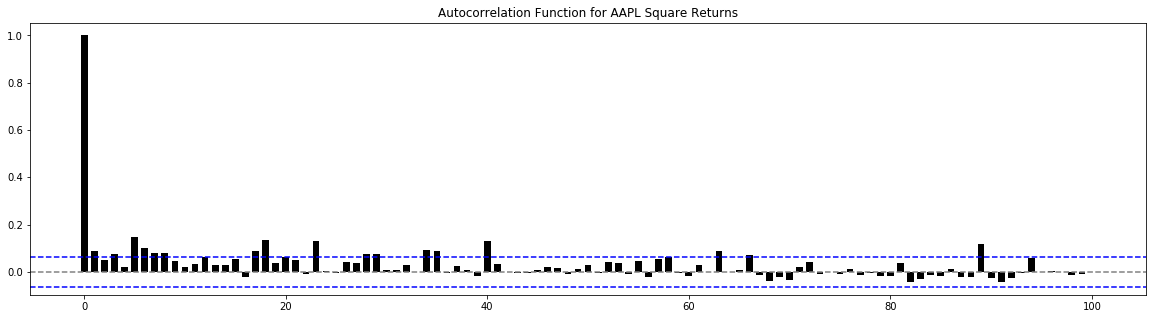

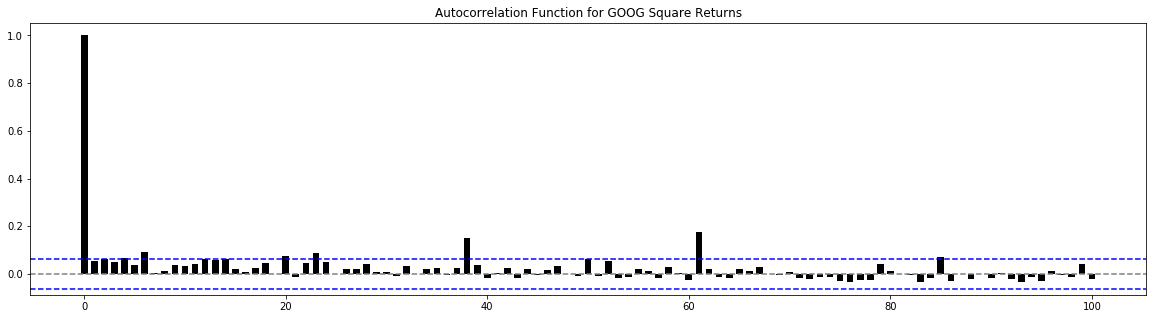

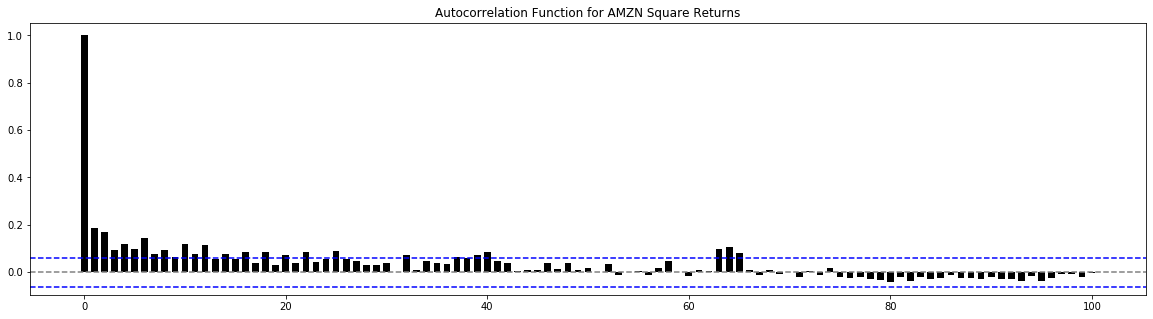

In [7]:
for i in range(len(companies)):
    company = returns[companies[i]]
    ReturnsACF = acf(np.power(company,2), nlags=100, fft=True)
    x = range(0,101)
    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(x,ReturnsACF,2/3, color="black")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(company)),linestyle='--',color='b')
    plt.axhline(y=1.96/np.sqrt(len(company)),linestyle='--',color='b')
    plt.title('Autocorrelation Function for '+companies[i]+ ' Square Returns')
plt.show()

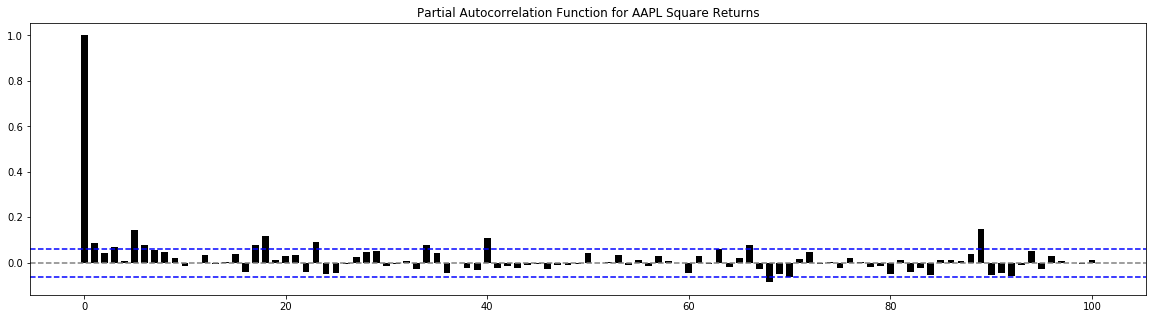

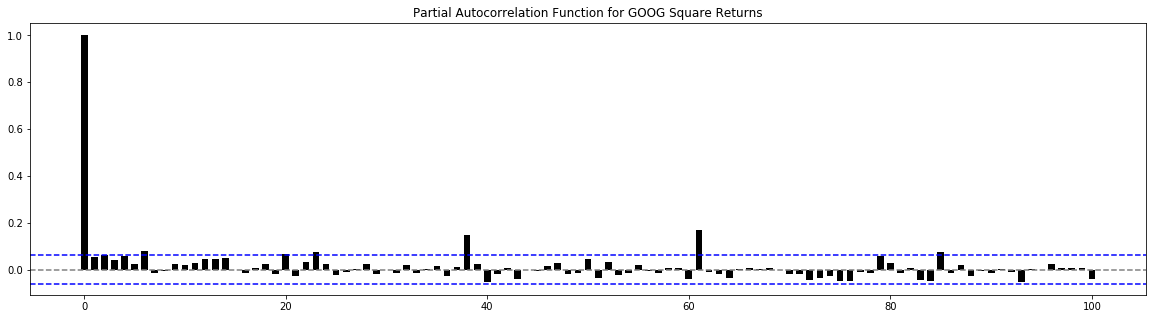

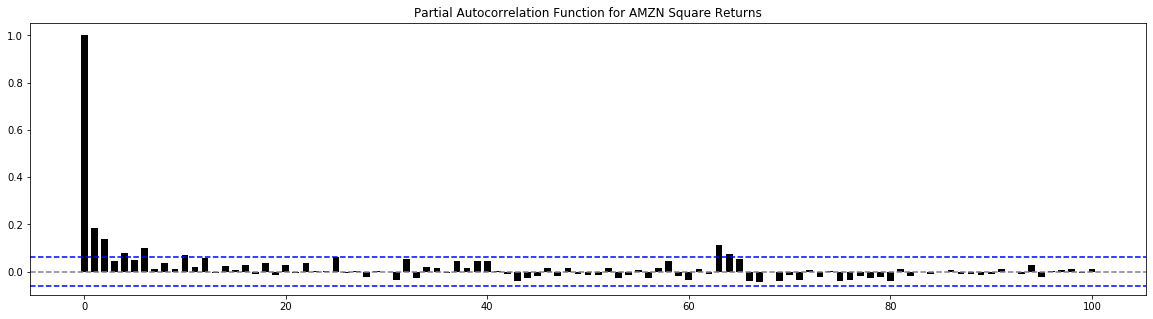

In [8]:
for i in range(len(companies)):
    company = returns[companies[i]]
    ReturnsPACF = pacf(np.power(company,2), nlags=100)
    x = range(0,101)
    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(x,ReturnsPACF,2/3, color="black")
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(company)),linestyle='--',color='b')
    plt.axhline(y=1.96/np.sqrt(len(company)),linestyle='--',color='b')
    plt.title('Partial Autocorrelation Function for '+companies[i]+ ' Square Returns')
plt.show()

### Univariate GARCH models with a normal innovation density.

AAPL                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   AAPL   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1769.60
Distribution:                  Normal   AIC:                           3547.21
Method:            Maximum Likelihood   BIC:                           3566.86
                                        No. Observations:                 1006
Date:                Thu, Apr 02 2020   Df Residuals:                     1002
Time:                        23:04:01   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1547  4.192e-02      3.690  2.239e-04 [7.2

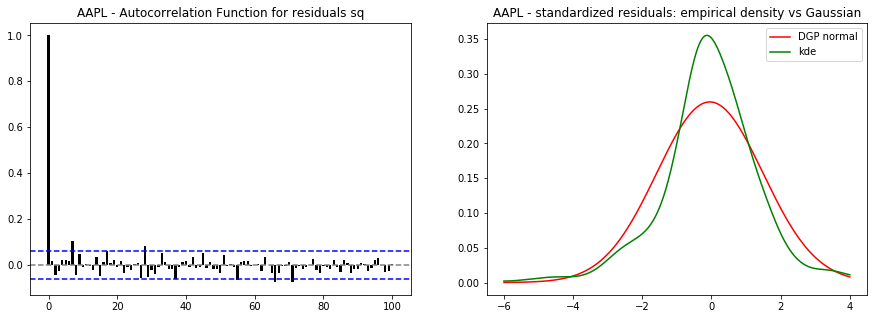

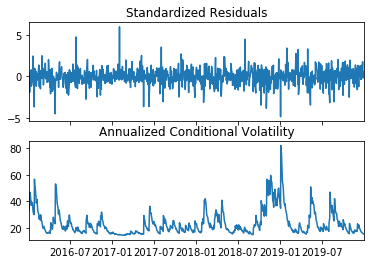



GOOG                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   GOOG   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1722.98
Distribution:                  Normal   AIC:                           3453.96
Method:            Maximum Likelihood   BIC:                           3473.61
                                        No. Observations:                 1006
Date:                Thu, Apr 02 2020   Df Residuals:                     1002
Time:                        23:04:01   Df Model:                            4
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0555  4.055e-02      1.368      0.171

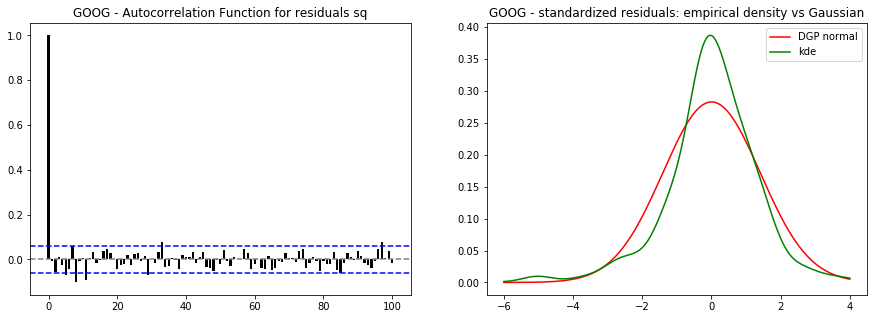

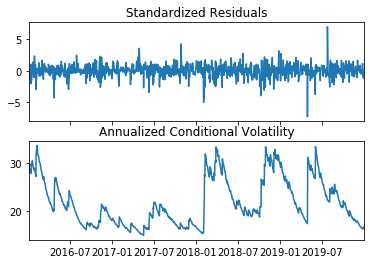



AMZN                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   AMZN   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1857.45
Distribution:                  Normal   AIC:                           3722.90
Method:            Maximum Likelihood   BIC:                           3742.55
                                        No. Observations:                 1006
Date:                Thu, Apr 02 2020   Df Residuals:                     1002
Time:                        23:04:02   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1292  5.197e-02      2.487  1.288e-02 [2

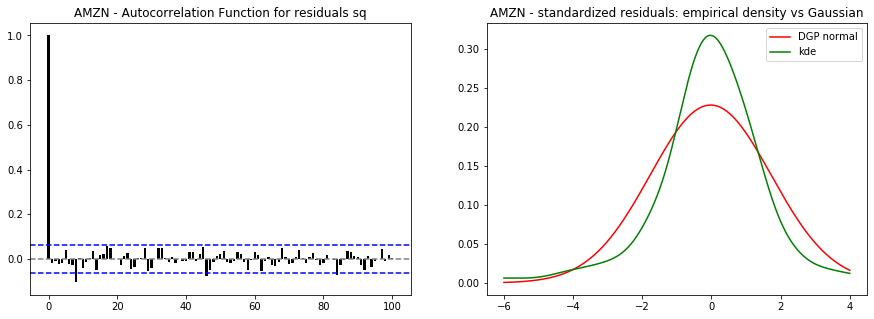

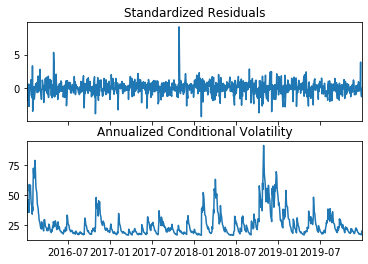

In [9]:
for i in range(len(companies)):
    gjrgarchmodel_gaussian = arch_model(returns[companies[i]],vol='Garch', p=0, o=1, q=1,dist='normal')
    gjrgarchmodel_gaussian_res = gjrgarchmodel_gaussian.fit(update_freq=20, disp='off')
    print(companies[i], gjrgarchmodel_gaussian_res.summary())
    
    res_garch=gjrgarchmodel_gaussian_res.resid[1:]
    mu=np.mean(res_garch)
    sig2=np.var(res_garch)
    d=stats.gaussian_kde(res_garch)
    ind = np.linspace(-6,4,500)
    kdepdf = d.evaluate(ind)
    fig, ax = plt.subplots(figsize=(15,5), ncols = 2)
    # plot histgram of sample
    ax[1].plot(ind, stats.norm.pdf(ind, loc = mu, scale = math.sqrt(sig2)), color="r", label='DGP normal')
    # plot estimated density
    ax[1].plot(ind, kdepdf, label='kde', color="g")
    ax[1].set_title(companies[i] + ' - standardized residuals: empirical density vs Gaussian')
    ax[1].legend()
    
    x = range(0,101)
    RessqGarchACF = acf(res_garch, nlags=100, fft=False)
    ax[0].bar(x,RessqGarchACF,2/3, color="black")
    ax[0].axhline(y=0,linestyle='--',color='gray')
    ax[0].axhline(y=-1.96/np.sqrt(len(res_garch)),linestyle='--',color='b')
    ax[0].axhline(y=1.96/np.sqrt(len(res_garch)),linestyle='--',color='b')
    ax[0].set_title(companies[i] + ' - Autocorrelation Function for residuals sq')
    fig = gjrgarchmodel_gaussian_res.plot(annualize='D')
    plt.show()
    print('\n')